# Deep Reinforcement Learning for Optimal Execution of Portfolio Transactions     

In [5]:
#import utils
import numpy as np
import matplotlib.pyplot as plt
import random

import syntheticChrissAlmgren as sca
from ddpg_agent import Agent

from collections import deque

# Get the default financial and AC Model parameters
plt.style.use('seaborn')
#financial_params, ac_params = utils.get_env_param()

In [ ]:
financial_params

Annual Volatility:,12%,Bid-Ask Spread:,0.125
Daily Volatility:,0.8%,Daily Trading Volume:,"5,000,000"


In [ ]:
ac_params

Total Number of Shares for Agent1 to Sell:,"500,000",Fixed Cost of Selling per Share:,$0.062
Starting Price per Share:,$50.00,Trader's Risk Aversion for Agent 1:,1e-06
Price Impact for Each 1% of Daily Volume Traded:,$2.5e-06,Permanent Impact Constant:,2.5e-07
Number of Days to Sell All the Shares:,60,Single Step Variance:,0.144
Number of Trades:,60,Time Interval between trades:,1.0


In [6]:
import torch

In [3]:
 agent1.pi(cur_state1)

Categorical(logits: tensor([0.], grad_fn=<SubBackward0>))

In [7]:
# Create simulation environment
env = sca.MarketEnvironment()

# Initialize Feed-forward DNNs for Actor and Critic models. 
agent1 = Agent(state_size=env.observation_space_dimension(), action_size=env.action_space_dimension(),random_seed = 1142)

# Set the liquidation time
lqt = 100

# Set the number of trades
n_trades = 60

# Set trader's risk aversion
tr1 = 0

# Set the number of episodes to run the simulation
episodes = 2000
shortfall_list = []
shortfall_hist1 = np.array([])
shortfall_deque1 = deque(maxlen=50000)
#shortfall_ac = []

for episode in range(episodes): 
    # Reset the enviroment
    cur_state1 = env.reset(seed = episode, liquid_time = lqt, num_trades = n_trades, lamb1 = tr1)

    # set the environment to make transactions
    env.start_transactions()

    avg_reward = 0.0
    for i in range(n_trades + 1):
      
        # Predict the best action for the current state. 

        #print(cur_state[5:])
        action1 = agent1.act(cur_state1, add_noise = False)[0]
        #print(action1,action2)
        # Action is performed and new state, reward, info are received.
       # print(env.shares_remaining1 * action1)

        new_state1, reward1, done1, info = env.step(action1)
        avg_reward += reward1
        # current state, action, reward, new state are stored in the experience replay

        agent1.step(cur_state1, action1, reward1, new_state1, done1)
        
      #  print(env.shares_remaining1)
        # roll over new state
        cur_state1 = new_state1

        if info.done1:
            shortfall_hist1 = np.append(shortfall_hist1, info.implementation_shortfall1)
            shortfall_deque1.append(info.implementation_shortfall1)
            #shortfall_ac.append(info.)
            avg_reward /= (n_trades + 1)
           # print('---------------------------------')
            break
        
    if (episode + 1) % 2 == 0: # print average shortfall over last 100 episodes
        print('\rEpisode [{}/{}]\tAverage Shortfall for Agent1: ${:,.2f}, average reward {}'.format(episode + 1, episodes, np.mean(shortfall_deque1), avg_reward))        
        shortfall_list.append([np.mean(shortfall_deque1)])
print('\nAverage Implementation Shortfall for Agent1: ${:,.2f} \n'.format(np.mean(shortfall_hist1)))
shortfall_rl = np.array(shortfall_list)

c:\Users\anas1\OneDrive\Рабочий стол\SberAI\Multi-Agent-RL-for-Liquidation-master\syntheticChrissAlmgren.py:259: RuntimeWarning: invalid value encountered in double_scalars
  fot = nft / dft
c:\Users\anas1\OneDrive\Рабочий стол\SberAI\Multi-Agent-RL-for-Liquidation-master\syntheticChrissAlmgren.py:269: RuntimeWarning: invalid value encountered in double_scalars
  st = nst / dst


Episode [2/2000]	Average Shortfall for Agent1: $149,210.53, average reward -0.2923707908000007
Episode [4/2000]	Average Shortfall for Agent1: $138,345.92, average reward -0.2923707908000007
Episode [6/2000]	Average Shortfall for Agent1: $168,687.07, average reward -0.2923707908000007
Episode [8/2000]	Average Shortfall for Agent1: $187,311.56, average reward -0.2923707908000007
Episode [10/2000]	Average Shortfall for Agent1: $198,299.35, average reward -0.2893152259950808
Episode [12/2000]	Average Shortfall for Agent1: $182,041.09, average reward -0.2833500089442632
Episode [14/2000]	Average Shortfall for Agent1: $185,153.24, average reward -0.2743125540327871
Episode [16/2000]	Average Shortfall for Agent1: $184,970.18, average reward -0.26385776943278677
Episode [18/2000]	Average Shortfall for Agent1: $176,712.13, average reward -0.25412438089016315
Episode [20/2000]	Average Shortfall for Agent1: $170,736.83, average reward -0.25465179055409765
Episode [22/2000]	Average Shortfall for A

KeyboardInterrupt: 

In [8]:
shortfall_rl = np.array(shortfall_list)

In [9]:
shortfall_rl

array([[149210.52786892],
       [138345.92491573],
       [168687.07245976],
       [187311.56345237],
       [198299.35480343],
       [182041.09329297],
       [185153.24153801],
       [184970.18051868],
       [176712.12620019],
       [170736.83095258],
       [156483.16388243],
       [169043.02266917],
       [164214.20809955],
       [160292.26780765],
       [167848.93758418],
       [161925.70598054],
       [165940.48916444],
       [163319.97726603],
       [165988.77502018],
       [167393.79838933],
       [172855.79735704],
       [170704.43956971],
       [170490.18071538],
       [165468.1008799 ],
       [160041.30080065],
       [156693.70957091],
       [158567.14217029],
       [179741.29854265],
       [192515.58451276],
       [212027.74862728],
       [239237.61369167],
       [227434.36694392],
       [201032.75254407],
       [183194.68790364],
       [182083.48044651],
       [186832.19393162],
       [166413.66394987],
       [170993.90135295],
       [1662

In [10]:
# Create simulation environment
env = sca.MarketEnvironment()

# Initialize Feed-forward DNNs for Actor and Critic models. 


AC_shortfall_expected = env.get_AC_expected_shortfall(env.total_shares1, env.kappa1)


# Set the number of episodes to run the simulation

shortfall_list = []
shortfall_hist1 = np.array([])
shortfall_deque1 = deque(maxlen=50000)

for episode in range(episodes): 
    # Reset the enviroment
    cur_state1 = env.reset(seed = episode, liquid_time = lqt, num_trades = n_trades, lamb1 = tr1)

    # set the environment to make transactions
    env.start_transactions()

    for i in range(n_trades + 1):
        class Info(object):
            pass
        info = Info()
        
        # Set the done flag to False. This indicates that we haven't sold all the shares yet.
        info.done1 = False
        
                
        # During training, if the DDPG fails to sell all the stocks before the given 
        # number of trades or if the total number shares remaining is less than 1, then stop transacting,
        # set the done Flag to True, return the current implementation shortfall, and give a negative reward.
        # The negative reward is given in the else statement below.
        if env.transacting1 and (env.timeHorizon == 0 or (abs(env.shares_remaining1) < env.tolerance)):
            env.transacting1 = False
            info.done1 = True
            info.implementation_shortfall1 = env.total_shares1 * env.startingPrice - env.totalCapture1
            info.expected_shortfall1 = env.get_expected_shortfall(env.total_shares1, env.totalSSSQ1)
            info.expected_variance1 = env.singleStepVariance * env.tau * env.totalSRSQ1
            info.utility1 = info.expected_shortfall1 + env.llambda1 * info.expected_variance1
        

        # We don't add noise before the first trade    
        if env.k == 0:
            info.price = env.prevImpactedPrice
        else:
            # Calculate the current stock price using arithmetic brownian motion
            info.price = env.prevImpactedPrice + np.sqrt(env.singleStepVariance * env.tau) * random.normalvariate(0, 1)
      
        # If we are transacting, the stock price is affected by the number of shares we sell. The price evolves 
        # according to the Almgren and Chriss price dynamics model. 
        if env.transacting1:
            
            # If action is an ndarray then extract the number from the array
            if isinstance(action1, np.ndarray):
                action1 = 2 * np.sinh(0.5 * env.kappa1 * env.tau) / np.sinh(env.kappa1 * lqt) * np.cosh(env.kappa1*(lqt - (i-0.5)*env.tau)) * env.total_shares1/env.shares_remaining1             

            # Convert the action to the number of shares to sell in the current step
            sharesToSellNow1 = env.shares_remaining1 * action1

            if env.timeHorizon < 2:
                sharesToSellNow1 = env.shares_remaining1
        else: 
            sharesToSellNow1 = 0
#             sharesToSellNow = min(self.shares_remaining * action, self.shares_remaining)

        if env.transacting1:

            # Since we are not selling fractions of shares, round up the total number of shares to sell to the nearest integer. 
            info.share_to_sell_now1 = np.around(sharesToSellNow1)
            
            # Calculate the permanent and temporary impact on the stock price according the AC price dynamics model
            info.currentPermanentImpact = env.permanentImpact(info.share_to_sell_now1)
            info.currentTemporaryImpact = env.temporaryImpact(info.share_to_sell_now1)
            
            # Apply the temporary impact on the current stock price    
            info.exec_price = info.price - info.currentTemporaryImpact
            
            # Calculate the current total capture
            env.totalCapture1 += info.share_to_sell_now1 * info.exec_price
            
            # Calculate the log return for the current step and save it in the logReturn deque
            env.logReturns.append(np.log(info.price/env.prevPrice))
            env.logReturns.popleft()
            
            # Update the number of shares remaining
            env.shares_remaining1 -= info.share_to_sell_now1
           
            
            # Calculate the runnig total of the squares of shares sold and shares remaining
            env.totalSSSQ1 += info.share_to_sell_now1 ** 2
            env.totalSRSQ1 += env.shares_remaining1 ** 2

                                        
            # Update the variables required for the next step
            env.timeHorizon -= 1
            env.prevPrice = info.price
            env.prevImpactedPrice = info.price - info.currentPermanentImpact
            
            
            # If all the shares have been sold calculate E, V, and U, and give a positive reward.
            if env.shares_remaining1 <= 0:
                
                # Calculate the implementation shortfall
                info.implementation_shortfall1  = env.total_shares1 * env.startingPrice - env.totalCapture1
                info.done1 = True

                   
                # Set the done flag to True. This indicates that we have sold all the shares
        
        env.k += 1
            
        # Set the new state
        #state = np.array(list(self.logReturns) + [self.timeHorizon / self.num_n, self.shares_remaining1 / self.total_shares1])





        # Predict the best action for the current state. 

        #print(cur_state[5:])
       
        if info.done1:
            shortfall_deque1.append(info.implementation_shortfall1)
            avg_reward /= (n_trades + 1)
           # print('---------------------------------')
            break
        
    if (episode + 1) % 2 == 0: # print average shortfall over last 100 episodes
        print('\rEpisode [{}/{}]\tAverage Shortfall for Agent1: ${:,.2f}'.format(episode + 1, episodes, np.mean(shortfall_deque1)))        
        shortfall_list.append([np.mean(shortfall_deque1)])


Episode [2/2000]	Average Shortfall for Agent1: $1,072,427.67
Episode [4/2000]	Average Shortfall for Agent1: $-385,462.14
Episode [6/2000]	Average Shortfall for Agent1: $-801,253.83
Episode [8/2000]	Average Shortfall for Agent1: $320,616.22
Episode [10/2000]	Average Shortfall for Agent1: $594,036.12
Episode [12/2000]	Average Shortfall for Agent1: $713,904.84
Episode [14/2000]	Average Shortfall for Agent1: $1,315,782.53
Episode [16/2000]	Average Shortfall for Agent1: $1,126,081.50
Episode [18/2000]	Average Shortfall for Agent1: $1,108,075.22
Episode [20/2000]	Average Shortfall for Agent1: $1,068,335.14
Episode [22/2000]	Average Shortfall for Agent1: $1,000,053.03
Episode [24/2000]	Average Shortfall for Agent1: $809,238.89
Episode [26/2000]	Average Shortfall for Agent1: $757,400.53
Episode [28/2000]	Average Shortfall for Agent1: $871,354.43
Episode [30/2000]	Average Shortfall for Agent1: $871,943.01
Episode [32/2000]	Average Shortfall for Agent1: $881,735.35
Episode [34/2000]	Average Shor

In [ ]:
shortfall_ac = np.array(shortfall_list) #$126,486.23

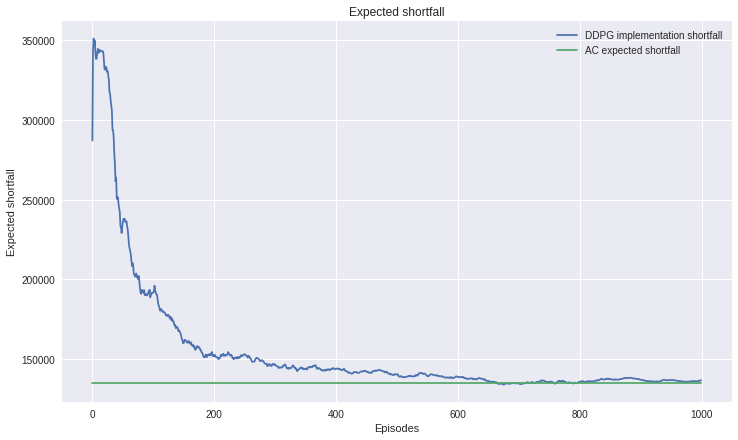

In [5]:
plt.figure(figsize = (12, 7))
plt.plot(shortfall_rl, label = 'DDPG implementation shortfall')
#plt.plot(shortfall_ac, label = 'AC implementation shortfall')
plt.plot(np.repeat(AC_shortfall_expected, len(shortfall_rl)), label = 'AC expected shortfall')
plt.xlabel('Episodes')
plt.ylabel('Expected shortfall')
plt.legend()
plt.title('Expected shortfall');

In [ ]:
np.save('1e-6_1e-6_cooporation_shorfall_list.npy',shortfall)

In [ ]:
cur_state1 = env.reset(seed = episode, liquid_time = lqt, num_trades = n_trades, lamb1 = tr1)

# set the environment to make transactions
env.start_transactions()

trajectory_agent = np.zeros([n_trades + 1])
trajectory_ac = np.zeros([n_trades + 1])

for i in range(n_trades + 1):
    trajectory_agent[i] = cur_state1[-1]
    trajectory_ac[i] = (np.sinh(env.kappa1*(lqt - i)) / np.sinh(env.kappa1 * lqt) * env.total_shares1) / env.total_shares1

    action1 = agent1.act(cur_state1, add_noise = True)
        #print(action1,action2)
        # Action is performed and new state, reward, info are received. 
    new_state1, reward1, done1, info = env.step(action1)
        
        # current state, action, reward, new state are stored in the experience replay
  
    agent1.step(cur_state1, action1, reward1, new_state1, done1)
    
        # roll over new state
    cur_state1 = new_state1

    if info.done1:
        shortfall_hist1 = np.append(shortfall_hist1, info.implementation_shortfall1)
        shortfall_deque1.append(info.implementation_shortfall1)
        break
        
if (episode + 1) % 100 == 0: # print average shortfall over last 100 episodes
    print('\rEpisode [{}/{}]\tAverage Shortfall for Agent1: ${:,.2f}'.format(episode + 1, episodes, np.mean(shortfall_deque1)))        


/content/syntheticChrissAlmgren.py:259: RuntimeWarning: invalid value encountered in double_scalars
  fot = nft / dft
/content/syntheticChrissAlmgren.py:269: RuntimeWarning: invalid value encountered in double_scalars
  st = nst / dst
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in double_scalars
  # This is added back by InteractiveShellApp.init_path()


Episode [2000/2000]	Average Shortfall for Agent1: $126,522.38


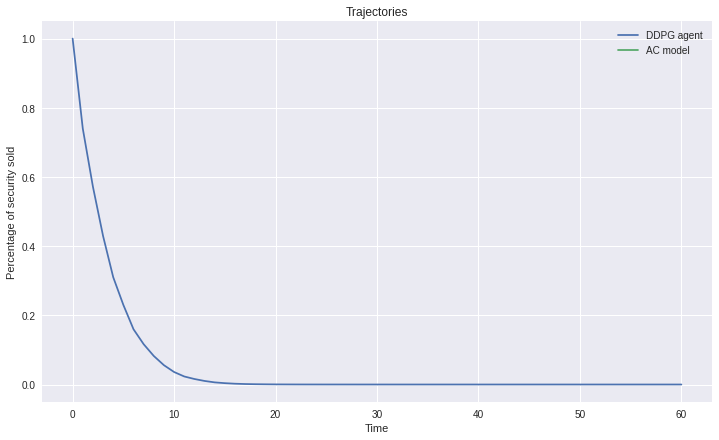

In [ ]:
plt.figure(figsize = (12, 7))
plt.plot(trajectory_agent, label = 'DDPG agent')
plt.plot(trajectory_ac, label = 'AC model')
plt.legend()
plt.xlabel('Time')
plt.ylabel('Percentage of security sold')
plt.title('Trajectories');

In [ ]:
np.save('1e-6_1e-6_competition_trajectory_1500.npy',trajectory)